In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import jieba
import seaborn as sns
import time

In [163]:
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei']

In [3]:
import win32com.client
spk = win32com.client.Dispatch("SAPI.SpVoice")
#spk.speak(u"完成")

In [ ]:
danmu_url = "https://comment.bilibili.com/33143182.xml"#弹幕request地址
danmu = requests.get(danmu_url).text
soup = bs(danmu,'lxml')
rows = []
for i in soup.select('d'):
    i_text = i.get_text() 
    i_p = i['p'].split(',') 
    i_p.append(i_text)
    rows.append(i_p)
        
records = pd.DataFrame(rows,columns = ['time','format','font','color','data_unix','danmuchi','ID','rowID','danmu'])
filename = 'guoyuedadian_ep1.csv'
records.to_csv(filename,index=False)
spk.speak(u"爬取弹幕完成")

### read comments file

In [4]:
comments = pd.read_csv('guoyuedadian_ep1.csv',engine='python',encoding='gbk')

In [5]:
comments.head()

,time,format,font,color,data_unix,danmuchi,ID,rowID,danmu
0,0.902,1,25,16777215,1520010543,0,31b4e2cc,4359984495,看了预告很精彩 没看直播来看回放
1,315.896,1,25,16777215,1520010620,0,2bd96a73,4359987487,赞
2,10.684,1,25,16777215,1520010762,0,4c95f917,4359992918,修仙福利
3,61.272,5,25,15138834,1520010943,0,df797d3b,4359999519,第一是我
4,459.056,1,25,16777215,1520010947,0,cfa272cf,4359999659,突然春晚感觉。。。。


In [6]:
comments.tail()

,time,format,font,color,data_unix,danmuchi,ID,rowID,danmu
4209,1916.773,1,25,16777215,1520568666,0,28fb97ad,4374659111,1.外行看热闹，内行看门道
4210,1918.886,1,25,16777215,1520568718,0,28fb97ad,4374660382,2.作为一个外行，不是特别明显的差异，你能听出什么音差，还不是人云亦云，自我装逼？
4211,1920.418,1,25,16777215,1520568796,0,28fb97ad,4374662500,3.内行看门道，人家玩的起这个，音色不行，技艺补啊，本来这个表演也不是面向专业人士，怎么高大...
4212,1005.960,1,25,16777215,1520568923,0,7d4f1592,4374665957,拿地方台和央视比的，你们脑子在想什么呢
4213,2130.698,1,25,16777215,1520569028,0,28fb97ad,4374668968,灯光太闪了，眼泪都出了


In [7]:
comments.shape

(4214, 9)

In [8]:
comments.dtypes

time         float64
format         int64
font           int64
color          int64
data_unix      int64
danmuchi       int64
ID            object
rowID          int64
danmu         object
dtype: object

In [9]:
comments.isnull().sum()

time         0
format       0
font         0
color        0
data_unix    0
danmuchi     0
ID           0
rowID        0
danmu        0
dtype: int64

In [10]:
comments_unique = comments.drop_duplicates(['ID','danmu','data_unix']).reset_index()

In [11]:
comments_unique.shape

(4214, 10)

In [12]:
comments_unique.head()

,index,time,format,font,color,data_unix,danmuchi,ID,rowID,danmu
0,0,0.902,1,25,16777215,1520010543,0,31b4e2cc,4359984495,看了预告很精彩 没看直播来看回放
1,1,315.896,1,25,16777215,1520010620,0,2bd96a73,4359987487,赞
2,2,10.684,1,25,16777215,1520010762,0,4c95f917,4359992918,修仙福利
3,3,61.272,5,25,15138834,1520010943,0,df797d3b,4359999519,第一是我
4,4,459.056,1,25,16777215,1520010947,0,cfa272cf,4359999659,突然春晚感觉。。。。


In [13]:
comments_unique.drop('index',axis=1,inplace=True)

### analysis

In [92]:
time_danmu = comments['time']
time_danmu.min(),time_danmu.max()

(0.0, 5498.7659999999996)

Text(0.5,1,'Comments Distributions')

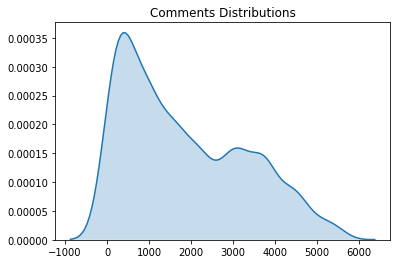

In [15]:
sns.kdeplot(np.array(list(time_danmu)), shade=True).set_title('Comments Distributions')

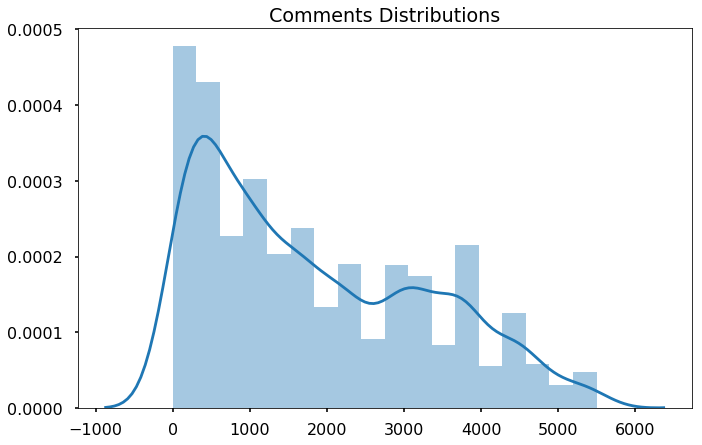

In [97]:
plt.figure(figsize=(11,7))
sns.distplot(np.array(list(time_danmu)),kde=True, hist=True).set_title('Comments Distributions')
sns.set_context("poster",font_scale=1.0)

### days

In [70]:
time.gmtime(1520006400)

time.struct_time(tm_year=2018, tm_mon=3, tm_mday=2, tm_hour=16, tm_min=0, tm_sec=0, tm_wday=4, tm_yday=61, tm_isdst=0)

In [76]:
time.gmtime(1520006400+ 8*60*60)

time.struct_time(tm_year=2018, tm_mon=3, tm_mday=3, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=5, tm_yday=62, tm_isdst=0)

In [74]:
all_time = comments['data_unix']
all_time_array = np.array(all_time) + 8*60*60
all_time_array_days = all_time_array/(24*60*60)

In [84]:
days = all_time_array_days - 3

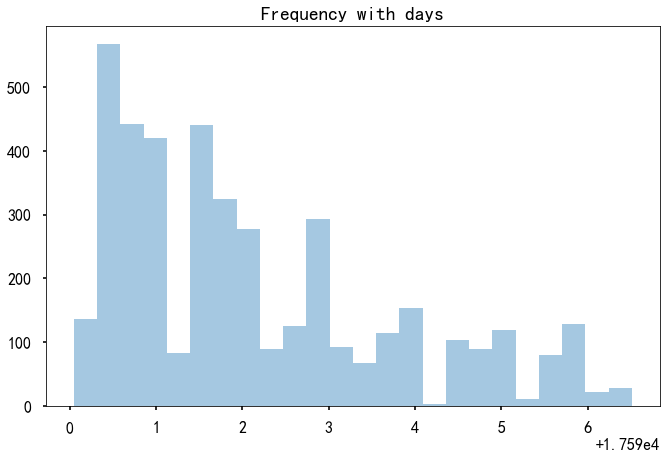

In [210]:
plt.figure(figsize=(11,7))
sns.distplot(days,kde=False).set_title('Frequency with days')
sns.set_context("poster",font_scale=1.0)

### 24h

In [19]:
all_time_array_24 = all_time_array%(24*60*60)/(60*60)

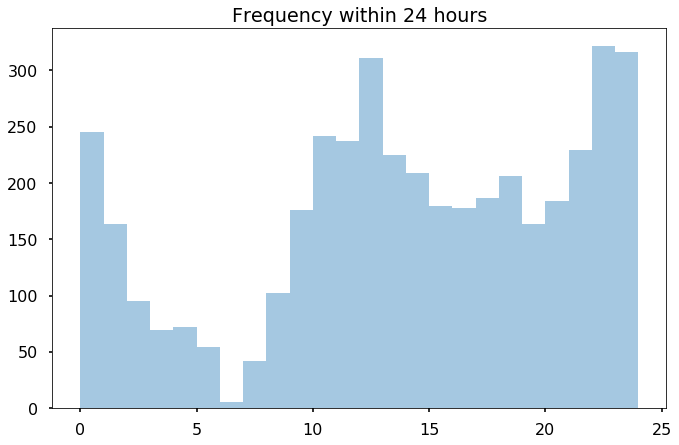

In [98]:
plt.figure(figsize=(11,7))
sns.distplot(all_time_array_24,bins=24,kde=False).set_title('Frequency within 24 hours')
#sns.plt.xlim(0, 24)
sns.set_context("poster",font_scale=1.0)

### 词频分析

In [21]:
comments[['ID','danmu']]

,ID,danmu
0,31b4e2cc,看了预告很精彩 没看直播来看回放
1,2bd96a73,赞
2,4c95f917,修仙福利
3,df797d3b,第一是我
4,cfa272cf,突然春晚感觉。。。。
5,cfa272cf,把马头琴跟吉他一样弹，他们也是有才
6,a7bd57e3,修仙党无所畏惧
7,59e68396,看到这么少人 我来支持一把吧
8,96214c1f,哇！一上来就编钟大招
9,96214c1f,这声音我以为唢呐


In [22]:
all_comments = " ".join(list(comments['danmu']))
all_comments_cut = list(jieba.cut(all_comments.strip(),cut_all=False))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Bowen\AppData\Local\Temp\jieba.cache
Loading model cost 2.860 seconds.
Prefix dict has been built succesfully.


In [23]:
len(all_comments_cut)

34820

In [24]:
all_comments_cut[:20]

['看',
 '了',
 '预告',
 '很',
 '精彩',
 ' ',
 ' ',
 '没',
 '看',
 '直播',
 '来看',
 '回放',
 ' ',
 '赞',
 ' ',
 '修仙',
 '福利',
 ' ',
 '第一',
 '是']

- 处理字符和停用词

In [25]:
# './stopword_chinese.txt'
# 创建停用词list  
def create_stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf8').readlines()]  
    return stopwords  

stopwords = create_stopwordslist('./stopword_chinese.txt')
#stopwords.pop(0)
stopwords.append(' ')


In [26]:
refined_words = []
for word in all_comments_cut:
    if word not in stopwords:
        if word !='\t':
            refined_words.append(word)

- 词频统计

In [27]:
from collections import Counter

In [28]:
container = Counter(refined_words)

In [29]:
sorted_container = sorted(container.items(),key=lambda x:x[1],reverse=True)

In [30]:
sorted_container

[('感觉', 201),
 ('架子鼓', 144),
 ('听', 136),
 ('乐器', 134),
 ('节目', 128),
 ('灯光', 121),
 ('喜欢', 115),
 ('老师', 108),
 ('央视', 107),
 ('真的', 106),
 ('说', 104),
 ('国乐', 100),
 ('音乐', 98),
 ('好听', 95),
 ('声音', 87),
 ('主持人', 82),
 ('太', 80),
 ('民乐', 79),
 ('古琴', 69),
 ('弹幕', 67),
 ('大师', 67),
 ('想', 65),
 ('国家', 65),
 ('二胡', 64),
 ('宝藏', 63),
 ('做', 63),
 ('收音', 62),
 ('哈哈哈', 55),
 ('舞美', 51),
 ('舞台', 51),
 ('水晶', 49),
 ('琵琶', 48),
 ('希望', 48),
 ('加', 48),
 ('春晚', 46),
 ('陈军', 45),
 ('不错', 45),
 ('伴舞', 45),
 ('党', 43),
 ('主持', 42),
 ('演奏', 42),
 ('笛子', 41),
 ('不好', 41),
 ('古筝', 40),
 ('一点', 40),
 ('背景', 39),
 ('传统', 38),
 ('镜头', 37),
 ('乐团', 37),
 ('真', 36),
 ('厉害', 35),
 ('挺', 35),
 ('乱', 35),
 ('啊啊啊', 34),
 ('广东', 33),
 ('大提琴', 33),
 ('椅子', 32),
 ('小姐姐', 31),
 ('好看', 31),
 ('马头琴', 30),
 ('唢呐', 30),
 ('美', 30),
 ('伴奏', 30),
 ('爸爸', 30),
 ('call', 29),
 ('不行', 29),
 ('台', 29),
 ('棒', 28),
 ('支持', 27),
 ('终于', 27),
 ('地方', 27),
 ('特别', 26),
 ('听到', 26),
 ('路过', 26),
 ('电子', 26),
 ('鸡皮疙瘩', 25),
 (

In [208]:
index_ = []
value_ = []
for item in sorted_container[:30]:
    index_.append(item[0])
    value_.append(item[1])
wordfrq = pd.DataFrame(value_,index=index_,columns=['counter'])

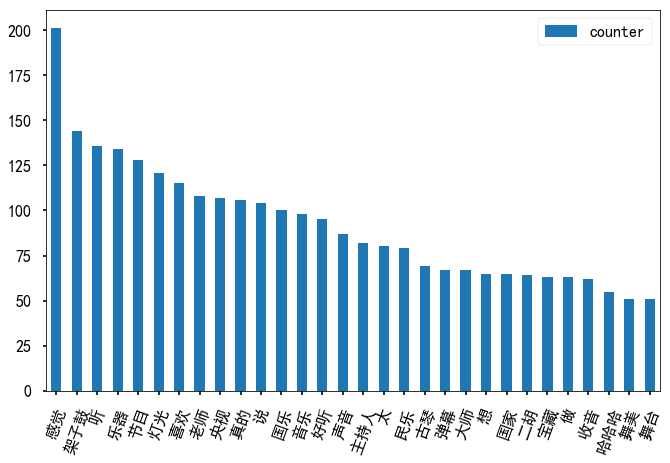

In [209]:
wordfrq.plot(kind='bar',figsize=(11, 7),rot=70)

In [188]:
?wordfrq.plot()

In [153]:
?plt.hist()

- 关键词

In [47]:
from jieba import analyse

In [48]:
tags_tfidf = analyse.extract_tags(all_comments,topK=20)

In [49]:
tags_tfidf

['架子鼓',
 '国乐',
 '感觉',
 '乐器',
 '节目',
 '灯光',
 '央视',
 '弹幕',
 '民乐',
 '好听',
 '这个',
 '收音',
 '古琴',
 '老师',
 '喜欢',
 '音乐',
 '二胡',
 '主持人',
 '舞美',
 '真的']

In [50]:
tags_textrank = analyse.textrank(all_comments,topK=20,withWeight=True,allowPOS=('ns','n','vn','v'))

In [51]:
for tag in tags_textrank:
    print(tag[0],tag[1])

感觉 1.0
乐器 0.6987496556700787
架子鼓 0.6738676148732892
节目 0.5764571708662691
有点 0.5746297852221112
灯光 0.5438161853684068
没有 0.5253739348921365
音乐 0.5094308500751462
国乐 0.5053846603130613
喜欢 0.48889989952839913
声音 0.4424572195865187
老师 0.42667904295321396
民乐 0.41418928164209323
主持人 0.40240529572598016
弹幕 0.38103242688691197
觉得 0.3546895163685113
好听 0.34740308153744665
二胡 0.2962805271682531
收音 0.28576592421828173
大师 0.2832528464043327


- 词云

In [53]:
from wordcloud import WordCloud

In [54]:
words_space_split = " ".join(refined_words)

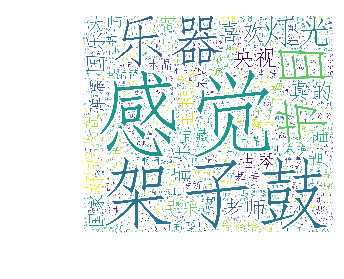

In [56]:
comments_wordcloud = WordCloud(collocations=False,\
font_path=r"C:\Windows\Fonts\simfang.ttf",width=4000,\
height=2000,max_words=500,background_color='white').generate(words_space_split) # 生成词云

plt.imshow(comments_wordcloud)
plt.axis("off")
plt.show()
#comments_wordcloud.to_file('wordcloud.png')# 保存